In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sys import modules
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Introduction

[Decision trees][1] are the most well-known and widely-used classification method. For first illustration, let's have a look at the BMI dataset.

[1]: https://en.wikipedia.org/wiki/Decision_tree_learning "Decision tree - Wikipedia"

In [2]:
if 'google.colab' in modules:
    from google.colab import files
    uploaded = files.upload()

Saving BMI.txt to BMI.txt


In [3]:
BMI = pd.read_csv('BMI.txt')
BMI.head()

,Sex,Age,Height,Weight
0,f,26,171.1,57.0
1,m,44,180.1,84.7
2,m,32,161.9,73.6
3,m,27,176.5,81.0
4,f,26,167.3,57.4


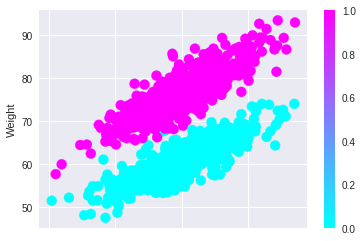

In [ ]:
BMI.plot('Height', 'Weight', kind='scatter', s=100,
         c=BMI.Sex.astype('category').cat.codes, cmap='cool')

Decision trees are asking YES/NO questions on the values of the features and try to generalize the answers based on the available data. The general form of a decision tree for the BMI dataset is illustrated below.

<img src="sex_tree.png" alt="illustrative tree" style="width: 550px;"/>

## Terminology

Decision trees are constructed **top-down** by iteratively **splitting** the data-points into **nodes** that improve the classification with every split. The criterion for splitting a node is improving some predefined **metric**, and the process continues until some stopping criterion is reached. The final nodes, ideally containing data-points from a single class, are called **leaves**. Understanding the splitting criterions is quite complicated, but for the record we will mention the two most common ones - minimizing the [**Gini impurity**][1] and maximizing the [**information gain**][2].


[1]: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity "Gini impurity"
[2]: https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain "Information gain"

## Parameters

Trees construction is based on many (hyper-)parameters, and using them properly is critical for avoiding overfitting. Here are some of them:

* _max_\__depth_ - The maximum depth of the tree (the root is not counted)
* _min_\__samples_\__leaf_ - The minimum number of samples required to be at a leaf node (default=1)
* _min_\__gain_ - the minimum allowed improvement in the splitting criteria

## Visualization

Trees are a special case of graphs, and visualizing graphs is a complicated matter. Actually it is so complicated, that _matplotlib_ decided to NOT include it in their package... Fortunately, other tools are available, and Scikit-learn chose **[Graphviz][1]** for visualizing their trees.

GraphViz is an open source graph visualization software, and it uses a special language called [DOT][2] for describing graphs textually. After we will have a fitted decision tree, we will apply the _export_\__graphviz()_ function to create a .dot file with the model information and visualization parameters (more about that below). This file can be used to produce the actual tree within Graphviz. For full graph visualization the Graphviz software should be installed, but for our purposes we will suffice with the [Graphviz web interface][3].

[1]: http://www.graphviz.org/ "Graphviz homepage"
[2]: http://www.graphviz.org/content/dot-language "The DOT language"
[3]: http://www.webgraphviz.com/ "Graphviz web interface"

# Illustrative example

The [seven-segment display][1] is a very common display device for digits. It is made of seven "segments", marked by the letters 'a' to 'g', which in different lighting combinations represent all 10 digits. The file digits.csv contains some supervised information of several such combinations, and our classification problem is to come up with decision rules for identifying the digit based on that.

[1]: https://en.wikipedia.org/wiki/Seven-segment_display "Seven-segment display - Wikipedia"

<img src="seven_segment.png" alt="seven segment" style="width: 250px;"/>

## Get the data

In [4]:
if 'google.colab' in modules:
    from google.colab import files
    uploaded = files.upload()

Saving digits.csv to digits.csv


In [5]:
digits = pd.read_csv("digits.csv")
digits.head(6)

,a,b,c,d,e,f,g,digit
0,0,1,1,0,0,1,1,four
1,0,0,1,1,0,1,1,five
2,1,1,1,0,1,1,1,eight
3,1,1,1,1,0,1,1,nine
4,1,1,0,1,1,1,1,eight
5,1,0,1,1,0,1,1,five


For later reference, let's see how many digits are there from each class.

In [6]:
digits.digit.value_counts()

zero     31
eight    30
nine     28
seven    28
five     25
six      24
one      23
three    23
two      21
four     21
Name: digit, dtype: int64

## Fit the model

We instantiate the model with reasonable (hyper)parametrs.

In [ ]:
digits_dt = DecisionTreeClassifier(max_depth=5,
                                   min_samples_leaf=10)

The explanatory variables, aka features, are the 'a'-to-'g' segments of the digits. The target vaiable is the digit itself.

In [ ]:
X = digits.drop('digit', axis=1)
y = digits.digit

Now we can simply apply the _fit()_ method.

In [10]:
digits_dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Model inspection

To simplify the following discussions, let us start by visualizing the tree.

> **NOTE:** This is a simplified version of the actual tree, but it will be enough for our purposes.

<img src="final digit tree.png" alt="final digit tree" style="width: 750px;"/>

## Assess the model

First we apply the classification model to the (training) data and append the predictions to the data.

In [14]:
digits['digit_pred'] = digits_dt.predict(X)
digits.head()

,a,b,c,d,e,f,g,digit,digit_pred
0,0,1,1,0,0,1,1,four,four
1,0,0,1,1,0,1,1,five,five
2,1,1,1,0,1,1,1,eight,eight
3,1,1,1,1,0,1,1,nine,nine
4,1,1,0,1,1,1,1,eight,eight


Now we can evaluate the confusion matrix and its related success measures.

In [17]:
cm = confusion_matrix(y_true=digits.digit,
                      y_pred=digits.digit_pred)
pd.DataFrame(cm,
             index=digits_dt.classes_,
             columns=digits_dt.classes_)

,eight,five,four,nine,one,seven,six,three,two,zero
eight,28,0,0,1,0,0,0,0,0,1
five,0,24,0,0,0,0,1,0,0,0
four,0,0,19,0,1,0,0,0,1,0
nine,1,1,0,26,0,0,0,0,0,0
one,0,0,0,0,23,0,0,0,0,0
seven,0,0,0,0,0,27,0,1,0,0
six,0,1,0,0,0,0,22,0,1,0
three,0,1,0,1,0,0,0,21,0,0
two,1,0,0,0,0,0,1,1,18,0
zero,0,0,0,0,0,0,0,0,0,31


In [18]:
print (classification_report(y_true=digits.digit,
                            y_pred=digits.digit_pred))

             precision    recall  f1-score   support

      eight       0.93      0.93      0.93        30
       five       0.89      0.96      0.92        25
       four       1.00      0.90      0.95        21
       nine       0.93      0.93      0.93        28
        one       0.96      1.00      0.98        23
      seven       1.00      0.96      0.98        28
        six       0.92      0.92      0.92        24
      three       0.91      0.91      0.91        23
        two       0.90      0.86      0.88        21
       zero       0.97      1.00      0.98        31

avg / total       0.94      0.94      0.94       254



## Visualize the model

The [_export_\__graphviz()_][1] is also part of the _sklearn.tree_ module, and it generates the DOT format description of the decision tree. Its API controls several useful arguments for manipulating the resutled visualization, and the main ones are:

* **mandatory**
    * _decision_\__tree_ - the tree object
    * _out_\__file_ - the file name to which the tree is exported. Should have a **.dot** extension.
* **Descriptive**
    * _feature_\__names_ - the names of the features (default=None)
    * _class_\__names_ - the names of the classes (default=None)    
* **Layout**
    * _leaves_\__parallel_ - whether of not to display all the nodes on the same level (default=False)
    * _filled_ - whether or not to assign a color to each category and fill the nodes accordingly (default=False)
    * _rotate_ - whether to drae the tree vertically or horizontally (default=False, i.e. vertically)
    * _rounded_ - whether to use a more curvy style for the nodes and text (default=False)

[1]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz "export_graphviz() documentation"

In [ ]:
export_graphviz(decision_tree=digits_dt,
                out_file='digits tree.dot',
                feature_names=X.columns,
                class_names=digits_dt.classes_,
                leaves_parallel=True,
                filled=True,
                rotate=False,
                rounded=True)

In [ ]:
if 'google.colab' in modules:
    from google.colab import files
    downloaded = files.download('digits tree.dot')

# Probability models

The ultimate prediction returns a **label**, corresponding to the class with the highest frequency within the relevant leaf of the tree. Many times the decision itself is not clear, and it is useful to know the probabilities of the other classes. Luckily this is a standard output of any classifier, as illustrated below.

The probability of each class can be evaluated from the model based on the number of its occurrences in the tree leaves.

In [19]:
pred_probas = pd.DataFrame(digits_dt.predict_proba(X),
                           columns=digits_dt.classes_)
pred_probas.head()

,eight,five,four,nine,one,seven,six,three,two,zero
0,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.888889,0.0,0.037037,0.0,0.0,0.037037,0.037037,0.000000,0.0
2,0.933333,0.000000,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.033333,0.0
3,0.035714,0.000000,0.0,0.928571,0.0,0.0,0.000000,0.035714,0.000000,0.0
4,0.933333,0.000000,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.033333,0.0


The final decision (assuming we take the class with the highest probability) can then be evaluated as well.

In [ ]:
pred_labels = pd.DataFrame(pd.Series(digits_dt.predict(X), 
                                     name='final decision'))
pred_labels.head()

,final decision
0,four
1,five
2,eight
3,nine
4,eight


For illustration we put them one next to the other.

In [ ]:
pd.concat((pred_probas, pred_labels), axis=1).head()

,eight,five,four,nine,one,seven,six,three,two,zero,final decision
0,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,four
1,0.000000,0.888889,0.0,0.037037,0.0,0.0,0.037037,0.037037,0.000000,0.0,five
2,0.933333,0.000000,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.033333,0.0,eight
3,0.035714,0.000000,0.0,0.928571,0.0,0.0,0.000000,0.035714,0.000000,0.0,nine
4,0.933333,0.000000,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.033333,0.0,eight
